In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
data = pd.read_excel('...Data Science Assignment.xlsx', sheet_name='Data')
data.head()

,Lead ID,bankid,bank_account_id,account_number,Industry,post_date,description,transaction_type,amount,running_balance,trans_order
0,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-10,DEPOSIT ID NUMBER xx6836,credit,5000.00,5671.40,1
1,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-21,ATM CASH DEPOSIT 03/21 2904 N BELT LINE RD IRV...,credit,16.00,5687.40,1
2,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-21,ATM CASH DEPOSIT 03/21 2904 N BELT LINE RD IRV...,credit,1000.00,5671.90,3
3,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-21,WAL-MART #0880 IRVING TXxx6007 03/20,debit,1015.50,4671.90,2
4,308148,8535,12460,xxxx9928,Accommodation and Food Services,2016-03-22,CHECK OR SUPPLY ORDERPPD ID: xxxxxx6800,debit,27.62,5644.28,1


# Exercise1 (i)

In [3]:
tdata = data
tdata.groupby('Lead ID')['bank_account_id'].nunique()

Lead ID
308148    1
310443    2
312745    5
313082    1
314036    1
314559    2
316728    6
318465    7
321146    2
321218    1
321356    5
321380    8
321671    1
323253    2
325142    1
325330    1
326050    1
326062    3
328212    1
329803    1
330698    1
Name: bank_account_id, dtype: int64

### data preparing and cleaning

In [4]:
#change post_date column into 'datetime' data type
tdata = data
tdata.post_date = pd.to_datetime(tdata.post_date)

In [5]:
tdata.post_date.head()

0   2016-03-10
1   2016-03-21
2   2016-03-21
3   2016-03-21
4   2016-03-22
Name: post_date, dtype: datetime64[ns]

In [6]:
#add month column into the data set
mn = []
for dt in tdata.post_date:
    mn.append(dt.month)
month = pd.DataFrame(mn)
test = tdata
new_data = pd.concat([test, month], axis=1)
new_data.rename(columns={0:'Month'}, inplace=True)
new_data.shape # final data set for whole programe: new_data

(29029, 12)

# Exercise1 (ii)

In [7]:
new_data.groupby('Lead ID')['Month'].nunique()

Lead ID
308148    10
310443    12
312745    12
313082    10
314036    11
314559    12
316728    12
318465     9
321146     9
321218    12
321356    12
321380    12
321671    12
323253    12
325142     8
325330    11
326050     8
326062    11
328212    12
329803    12
330698    12
Name: Month, dtype: int64

# Exercise1 (iii)

In [8]:

rr = new_data.groupby(['Lead ID','bank_account_id','transaction_type'])['Month'].agg(['count','nunique'])
dd = rr
dd['average_per_month'] = rr['count']/rr['nunique']
dd.rename(columns={'count':'number_of_transactions','nunique':'number_of_months'},inplace=True)
dd

number_of_transactions  \
Lead ID bank_account_id transaction_type                           
308148  12460           credit                               172   
                        debit                                320   
310443  12654           credit                                27   
                        debit                                223   
        12655           credit                                 8   
                        debit                                 23   
312745  12835           credit                                 7   
                        debit                                 11   
        12836           credit                                 3   
                        debit                                  5   
        12837           credit                                 1   
        12838           credit                                35   
                        debit                                 47   
        12839           credit                               114   
                        debit                                537   
313082  13233           credit                               112   
                        debit                               1026   
314036  13226           credit                               276   
                        debit                               1985   
314559  13271           credit                               135   
                        debit                                280   
        13273           credit                                 8   
                        debit                                  4   
316728  13228           credit                                21   
                        debit                                458   
        13230           credit                                85   
                        debit                                  2   
        13232           credit                               110   
                        debit                               1598   
        13234           credit                                35   
...                                                          ...   
321380  14634           debit                                 54   
        14635           credit                                43   
                        debit                                 52   
        14636           credit                              2303   
                        debit                                233   
        14637           credit                              2047   
                        debit                                348   
321671  14629           credit                               642   
                        debit                               1788   
323253  13877           credit                                17   
                        debit                                  7   
        13879           credit                               291   
                        debit                                418   
325142  14049           credit                               115   
                        debit                                876   
325330  15002           credit                               312   
                        debit                                257   
326050  14206           credit                               190   
                        debit                                459   
326062  14044           credit                               421   
                        debit                                604   
        14045           debit                                  2   
        14046           credit                               431   
                        debit                                837   
328212  14981           credit                               282   
                        debit                                345   
329803  14339           credit

# Exercise1 (iv)

In [9]:

dollar = new_data.groupby(['Lead ID','bank_account_id','transaction_type'])['amount'].agg(['sum'])
dollar['average_per_month'] = dollar['sum']/new_data.groupby(['Lead ID','bank_account_id','transaction_type'])['Month'].agg(['nunique'])['nunique']
dollar


sum  average_per_month
Lead ID bank_account_id transaction_type                                
308148  12460           credit               66611.03        6661.103000
                        debit                61799.63        6179.963000
310443  12654           credit              308732.78       44104.682857
                        debit               328895.38       46985.054286
        12655           credit               16400.44        2733.406667
                        debit                17766.66        1615.150909
312745  12835           credit               16054.00        4013.500000
                        debit                16054.00        4013.500000
        12836           credit               19055.79        9527.895000
                        debit                19035.00        4758.750000
        12837           credit                  25.00          25.000000
        12838           credit               29957.00        2995.700000
                        debit                29895.62        2717.783636
        12839           credit              654346.10       54528.841667
                        debit               648265.91       54022.159167
313082  13233           credit              547025.33       54702.533000
                        debit               558877.28       55887.728000
314036  13226           credit              445920.11       40538.191818
                        debit               432974.81       39361.346364
314559  13271           credit              521917.86       43493.155000
                        debit               513734.25       42811.187500
        13273           credit                5700.06         950.010000
                        debit                 6080.00        2026.666667
316728  13228           credit               86542.04        7211.836667
                        debit                86505.90        7208.825000
        13230           credit                 196.00          28.000000
                        debit                  180.00          90.000000
        13232           credit             1817750.53      151479.210833
                        debit              1770673.70      147556.141667
        13234           credit              423519.17       35293.264167
...                                               ...                ...
321380  14634           debit                25519.00        2126.583333
        14635           credit               25397.00        2116.416667
                        debit                25433.00        2119.416667
        14636           credit             1226645.15      102220.429167
                        debit              1225003.69      102083.640833
        14637           credit             1234885.00      102907.083333
                        debit              1239360.25      103280.020833
321671  14629           credit              312136.74       26011.395000
                        debit               307190.47       25599.205833
323253  13877           credit               20358.38        2035.838000
                        debit                20112.00        3352.000000
        13879           credit              956058.64      119507.330000
                        debit               970342.72      121292.840000
325142  14049           credit              472617.59       59077.198750
                        debit               463603.42       57950.427500
325330  15002           credit               82662.27        7514.751818
                        debit                80230.32        7293.665455
326050  14206           credit              288065.74       36008.217500
                        debit               271315.57       33914.446250
326062  14044           credit              382062.52       38206.252000
                        debit               390476.77       35497.888182
        14045           debit                   50.54          25.270000
        14046           credit     

# Exercise1 (v)

### Aggregate (iii)

In [10]:
v = new_data.groupby(['Lead ID','Industry','bankid','bank_account_id','transaction_type'])['amount'].agg(['count'])
v['average_per_month'] = v['count']/new_data.groupby(['Lead ID','Industry','bankid','bank_account_id','transaction_type'])['Month'].agg(['nunique'])['nunique']
v


count  \
Lead ID Industry                                         bankid bank_account_id transaction_type          
308148  Accommodation and Food Services                  8535   12460           credit              172   
                                                                                debit               320   
310443  Construction                                     6192   12654           credit               27   
                                                                                debit               223   
                                                                12655           credit                8   
                                                                                debit                23   
312745  Professional, Scientific, and Technical Services 8544   12835           credit                7   
                                                                                debit                11   
                                                                12836           credit                3   
                                                                                debit                 5   
                                                                12837           credit                1   
                                                                12838           credit               35   
                                                                                debit                47   
                                                                12839           credit              114   
                                                                                debit               537   
313082  Professional, Scientific, and Technical Services 8535   13233           credit              112   
                                                                                debit              1026   
314036  Retail Trade                                     9966   13226           credit              276   
                                                                                debit              1985   
314559  Information Technology                           8534   13271           credit              135   
                                                                                debit               280   
                                                                13273           credit                8   
                                                                                debit                 4   
316728  Construction                                     8534   13272           credit               30   
                                                                                debit                93   
                                                         8544   13228           credit               21   
                                                                                debit               458   
                                                                13230           credit               85   
                                                                                debit                 2   
                                                                13232           credit              110   
...                                                                                                 ...   
321380  Finance and Insurance                            10591  14630           debit                29   
                                                                14631           credit              113   
                                                                                debit                15   
                                                                14632           credit              125   
                                                                                debit                13   
                                

### Aggregate(iv)

In [11]:

v2 = new_data.groupby(['Lead ID','Industry','bankid','bank_account_id','transaction_type'])['amount'].agg(['sum'])
v2['average_per_month'] = v2['sum']/new_data.groupby(['Lead ID','Industry','bankid','bank_account_id','transaction_type'])['Month'].agg(['nunique'])['nunique']
v2


sum  \
Lead ID Industry                                         bankid bank_account_id transaction_type                
308148  Accommodation and Food Services                  8535   12460           credit               66611.03   
                                                                                debit                61799.63   
310443  Construction                                     6192   12654           credit              308732.78   
                                                                                debit               328895.38   
                                                                12655           credit               16400.44   
                                                                                debit                17766.66   
312745  Professional, Scientific, and Technical Services 8544   12835           credit               16054.00   
                                                                                debit                16054.00   
                                                                12836           credit               19055.79   
                                                                                debit                19035.00   
                                                                12837           credit                  25.00   
                                                                12838           credit               29957.00   
                                                                                debit                29895.62   
                                                                12839           credit              654346.10   
                                                                                debit               648265.91   
313082  Professional, Scientific, and Technical Services 8535   13233           credit              547025.33   
                                                                                debit               558877.28   
314036  Retail Trade                                     9966   13226           credit              445920.11   
                                                                                debit               432974.81   
314559  Information Technology                           8534   13271           credit              521917.86   
                                                                                debit               513734.25   
                                                                13273           credit                5700.06   
                                                                                debit                 6080.00   
316728  Construction                                     8534   13272           credit              131836.82   
                                                                                debit               125562.74   
                                                         8544   13228           credit               86542.04   
                                                                                debit                86505.90   
                                                                13230           credit                 196.00   
                                                                                debit                  180.00   
                                                                13232           credit             1817750.53   
...                                                                                                       ...   
321380  Finance and Insurance                            10591  14630           debit                30165.60   
                                                                14631           credit                1122.50   
                                                                                debit                 1161.00   
                                      

# Exercise 2

### Data preparation for Lead ID '318465' & bank_acccount_id '13419'

##### Step 1: Calculate the daily balance

In [12]:
id318 = new_data.loc[(new_data['Lead ID'] == 318465) & (new_data['bank_account_id'] == 13419)]
data_id318 = id318.reset_index()
data_credit = data_id318.loc[data_id318['transaction_type'] == 'credit']
data_credit = data_credit[['post_date','amount']]
data_debit = data_id318.loc[data_id318['transaction_type'] == 'debit']
data_debit = data_debit[['post_date','amount']]

#get the balance
balance = data_credit.groupby(['post_date']).sum()-data_debit.groupby(['post_date']).sum()

#clean the NaN in the balance
nan_fill = data_debit[data_debit['post_date'].isin(balance[balance['amount'].isnull()].index)]
nan_fill = -nan_fill.groupby('post_date').sum()

balance['amount'] = balance['amount'].fillna(value = nan_fill['amount'])

nan_fill2 = data_credit[data_credit['post_date'].isin(balance[balance['amount'].isnull()].index)]
nan_fill2 = nan_fill2.groupby('post_date').sum()

balance['amount'] = balance['amount'].fillna(value = nan_fill2['amount'])

##### Step 2: Put all data needed together

In [13]:
data_all = pd.DataFrame()
data_all['post_date'] = data_id318['post_date']
data_all['credit'] = data_credit['amount'].loc[data_credit['post_date'].isin(data_all['post_date'])]
data_all['debit'] = data_debit['amount'].loc[data_debit['post_date'].isin(data_all['post_date'])]

data_all = data_all.groupby(['post_date']).sum().reset_index()
data_all['balance'] = balance.reset_index()['amount']

In [14]:
data_all.head()

,post_date,credit,debit,balance
0,2016-04-12,793.26,44.44,748.82
1,2016-04-13,737.30,975.95,-238.65
2,2016-04-14,0.00,97.34,-97.34
3,2016-04-15,600.00,787.37,-187.37
4,2016-04-16,501.49,83.34,418.15


### Plot as daily time series 

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

data_all.plot(x='post_date', y='credit')
data_all.plot(x='post_date', y='debit')
data_all.plot(x='post_date', y='balance')

#plt.plot(data_all['post_date'], data_all['credit'], data_all['post_date'], data_all['debit'],data_all['post_date'], data_all['balance'])


plt.show()

### Data preparation for Lead ID '316728' & bank_acccount_id '13232'

In [16]:
id316 = new_data.loc[(new_data['Lead ID'] == 316728) & (new_data['bank_account_id'] == 13232)]
data_id316 = id316.reset_index()
data_credit2 = data_id316.loc[data_id316['transaction_type'] == 'credit']
data_credit2 = data_credit2[['post_date','amount']]
data_debit2 = data_id316.loc[data_id316['transaction_type'] == 'debit']
data_debit2 = data_debit2[['post_date','amount']]


balance2 = data_credit2.groupby(['post_date']).sum()-data_debit2.groupby(['post_date']).sum()


nan_fill_debit = data_debit2[data_debit2['post_date'].isin(balance2[balance2['amount'].isnull()].index)]
nan_fill_debit = -nan_fill_debit.groupby('post_date').sum()

balance2['amount'] = balance2['amount'].fillna(value = nan_fill_debit['amount'])

nan_fill_credit = data_credit2[data_credit2['post_date'].isin(balance2[balance2['amount'].isnull()].index)]
nan_fill_credit = nan_fill_credit.groupby('post_date').sum()

balance2['amount'] = balance2['amount'].fillna(value = nan_fill_credit['amount'])

In [17]:
data_all2 = pd.DataFrame()
data_all2['post_date'] = data_id316['post_date']
data_all2['credit'] = data_credit2['amount'].loc[data_credit2['post_date'].isin(data_all2['post_date'])]
data_all2['debit'] = data_debit2['amount'].loc[data_debit2['post_date'].isin(data_all2['post_date'])]

data_all2 = data_all2.groupby(['post_date']).sum().reset_index()
data_all2['balance'] = balance2.reset_index()['amount']

### Plot as daily time series

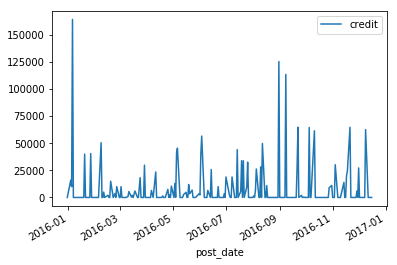

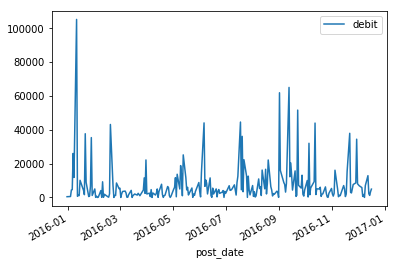

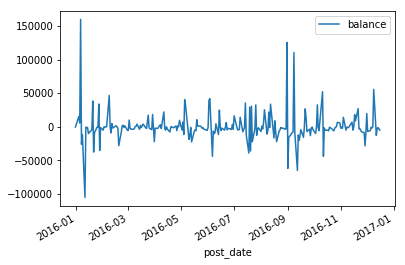

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

data_all2.plot(x='post_date', y='credit')
data_all2.plot(x='post_date', y='debit')
data_all2.plot(x='post_date', y='balance')


plt.show()

# Exercise 3

### Data preparation, packaged as a function

In [19]:
#input the whole cleaned data set (new_data here) & the Lead ID
#return all necessary data as a data set 

def data_clean(new_data,leadid):
    idx = new_data.loc[(new_data['Lead ID'] == leadid)]
    data_idx = idx.reset_index()
    data_idx = data_idx.groupby(['Lead ID','bank_account_id','post_date','transaction_type']).sum().reset_index()
    data_idx = data_idx[['bank_account_id','post_date','transaction_type','amount']].reset_index(drop=True)
    
    data_credit = data_idx.loc[data_idx['transaction_type'] == 'credit']
    data_credit = data_credit[['bank_account_id','post_date','amount']]
    data_debit = data_idx.loc[data_idx['transaction_type'] == 'debit']
    data_debit = data_debit[['bank_account_id','post_date','amount']]
    
    balance = data_credit.groupby(['bank_account_id','post_date']).sum()-data_debit.groupby(['bank_account_id','post_date']).sum()

    balance_credit = balance
    balance_debit = balance

    balance_credit['amount'] = 0
    balance_credit = balance_credit+data_credit.groupby(['bank_account_id','post_date']).sum()
    balance_credit = balance_credit.fillna(0)

    balance_debit['amount'] = 0
    balance_debit = balance_debit-data_debit.groupby(['bank_account_id','post_date']).sum()
    balance_debit = balance_debit.fillna(0)

    balance = balance_credit+balance_debit
    
    data_all = pd.DataFrame()
    data_all['bank_account_id'] = data_idx['bank_account_id']
    data_all['post_date'] = data_idx['post_date']
    data_all['credit'] = data_credit['amount'].loc[data_credit['post_date'].isin(data_all['post_date'])&\
                                              data_credit['bank_account_id'].isin(data_all['bank_account_id'])]
    data_all['debit'] = data_debit['amount'].loc[data_debit['post_date'].isin(data_all['post_date'])&\
                                              data_debit['bank_account_id'].isin(data_all['bank_account_id'])]

    data_all = data_all.groupby(['bank_account_id','post_date']).sum().reset_index()
    data_all['balance'] = balance.reset_index()['amount']
    
    return data_all



### Daily time series plot function

In [20]:
import matplotlib.pyplot as plt

def data_plot (da):
    for bk in da.groupby('bank_account_id').sum().index:
        time_plot = da.loc[da['bank_account_id']==bk]
        plt.figure()
        time_plot.plot(x='post_date', y='credit', title=bk)
        time_plot.plot(x='post_date', y='debit',title=bk)
        time_plot.plot(x='post_date', y='balance',title=bk)
    plt.show()



### Plot for Lead ID '318465'

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


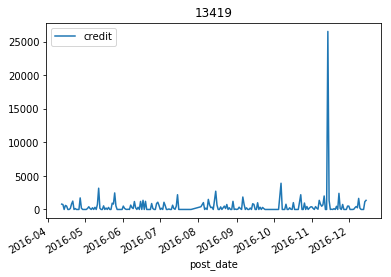

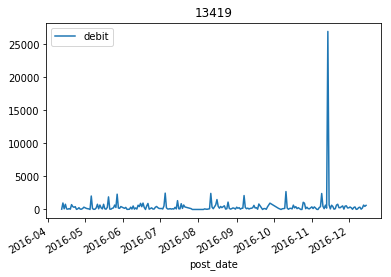

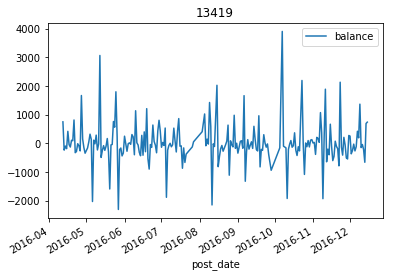

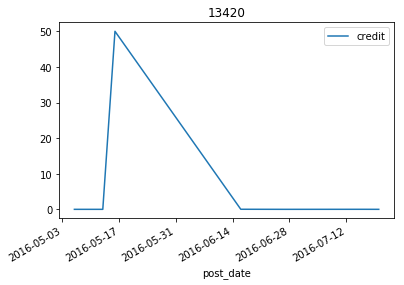

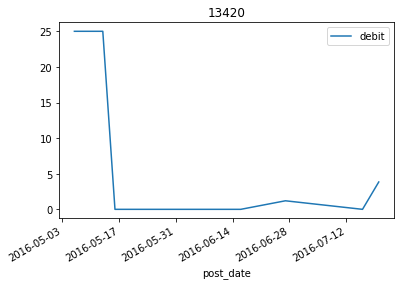

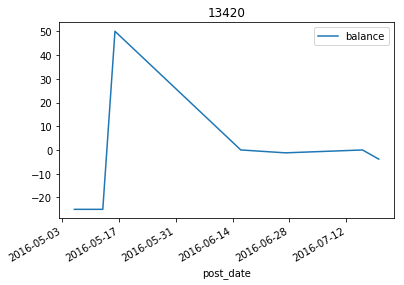

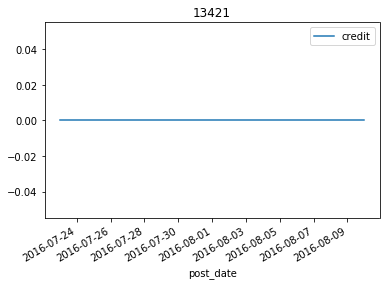

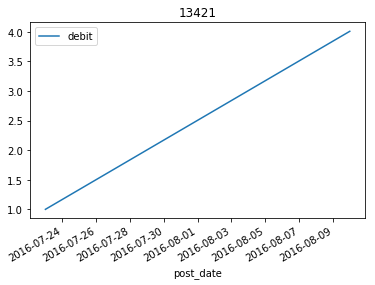

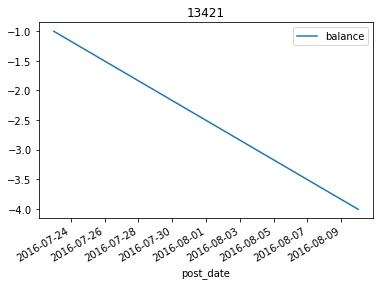

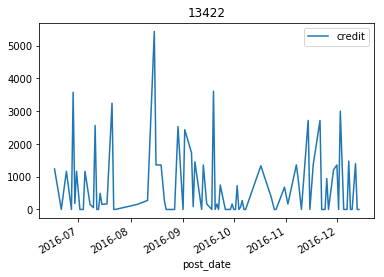

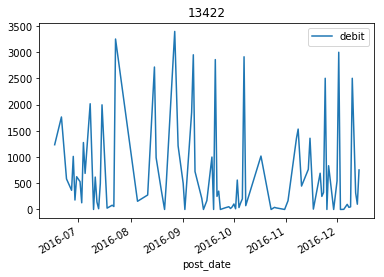

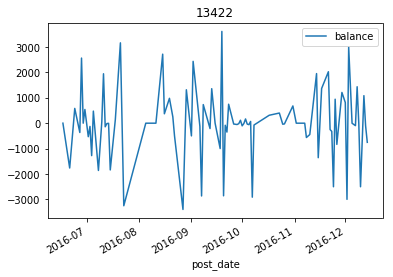

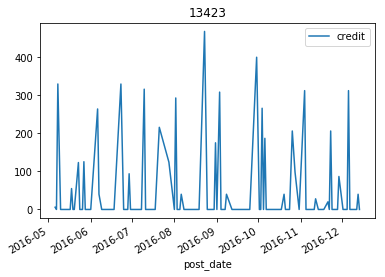

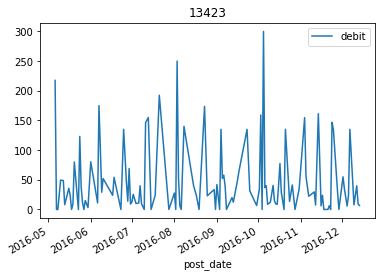

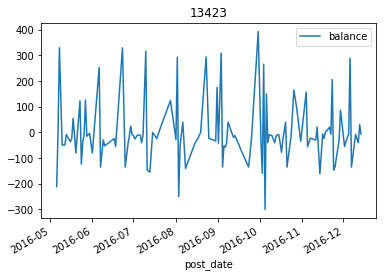

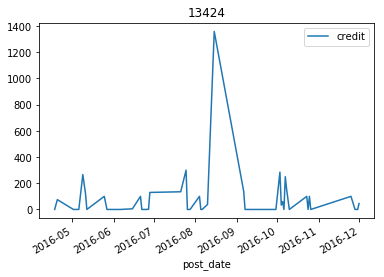

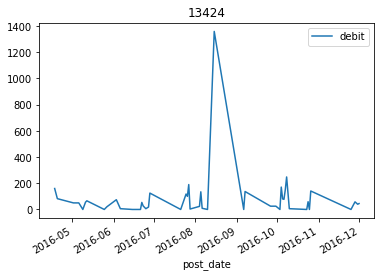

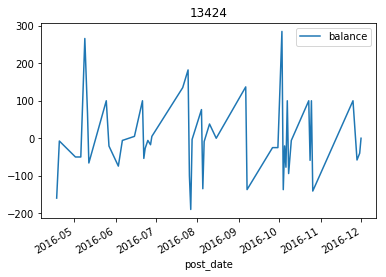

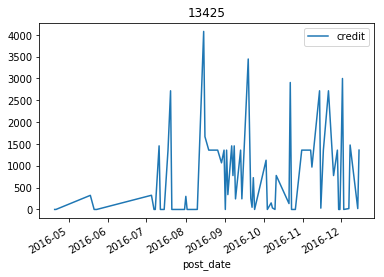

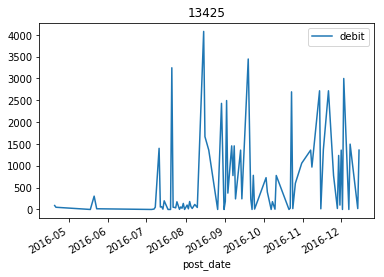

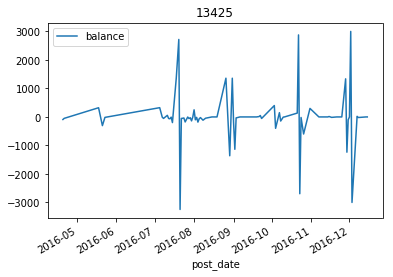

In [21]:
#data_318465
data_318465 = data_clean(new_data,318465)
data_plot(data_318465)
#Cell -> Current Output -> toggle
#Cell -> Current Output -> toggle

### Plot for Lead ID '316728'

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


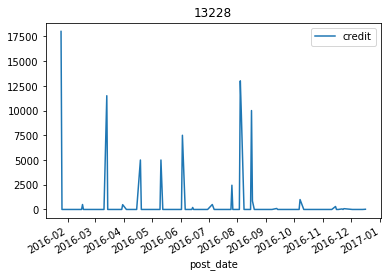

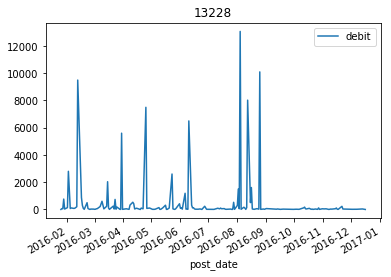

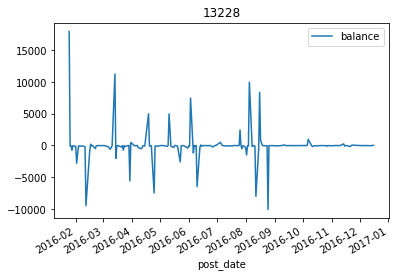

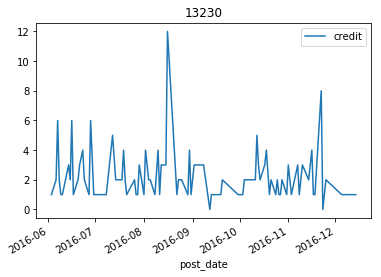

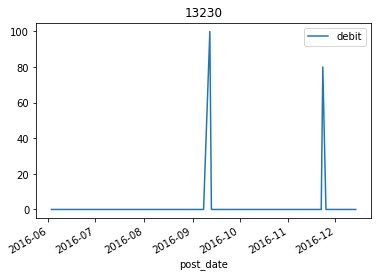

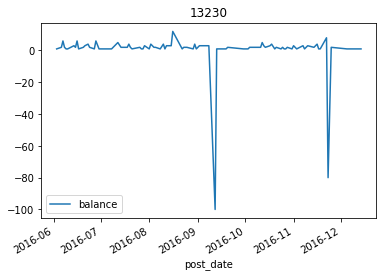

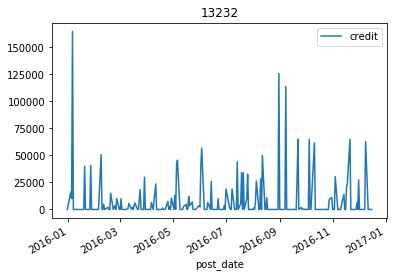

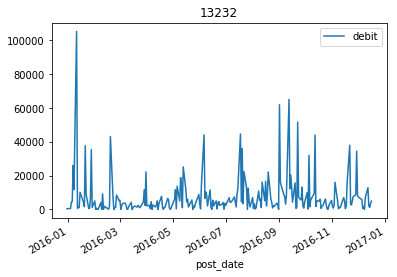

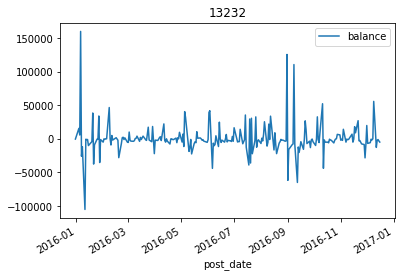

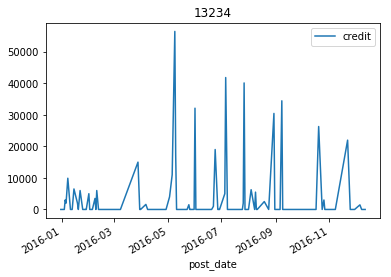

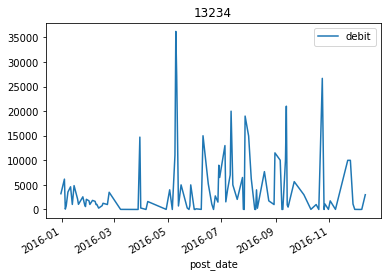

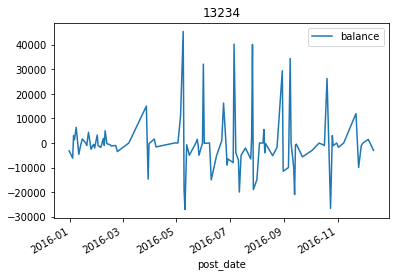

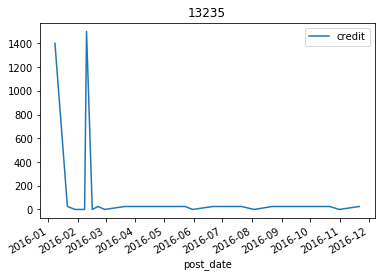

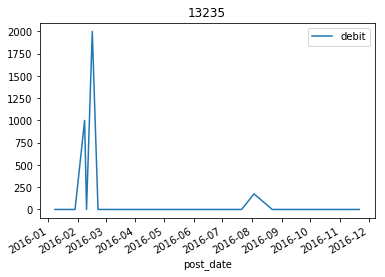

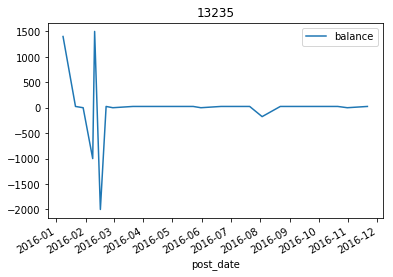

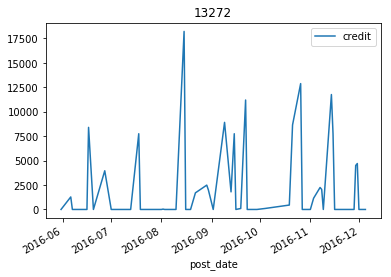

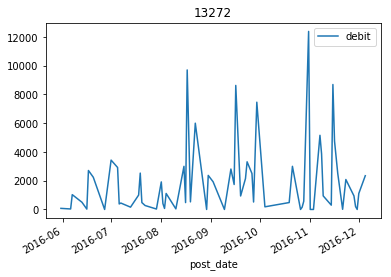

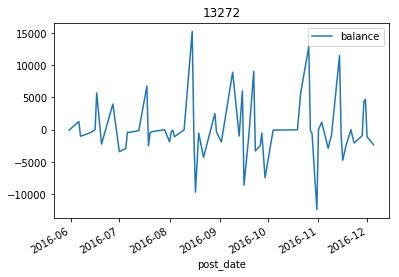

In [22]:
#data_316728
data_316728 = data_clean(new_data,316728)
data_plot(data_316728)
#Cell -> Current Output -> toggle
#Cell -> Current Output -> toggle


In [23]:
data_318465.to_csv('file_name1', sep='\t', encoding='utf-8')
data_316728.to_csv('file_name', sep='\t', encoding='utf-8')

# Exercise 4

### Multi-dimensional

### Top deposit

In [24]:
top_data = new_data[['Lead ID','post_date','transaction_type','amount']]

In [65]:
for merchant in top_data.groupby('Lead ID').sum().index:
    t1 = top_data.loc[top_data['Lead ID']== merchant]
    t2 = t1.loc[top_data['transaction_type']=='credit']
    t3 = t2.groupby(['Lead ID','post_date','transaction_type']).sum()
    t3.sort_values('amount',inplace = True, ascending = False)
    t4 = t3.head()
    print('Lead ID',merchant,' ',t4.head(5).sum()/t3.sum())

Lead ID 308148   amount    0.401161
dtype: float64
Lead ID 310443   amount    0.629487
dtype: float64
Lead ID 312745   amount    0.157307
dtype: float64
Lead ID 313082   amount    0.193541
dtype: float64
Lead ID 314036   amount    0.185312
dtype: float64
Lead ID 314559   amount    0.159253
dtype: float64
Lead ID 316728   amount    0.235984
dtype: float64
Lead ID 318465   amount    0.274819
dtype: float64
Lead ID 321146   amount    0.380942
dtype: float64
Lead ID 321218   amount    0.508024
dtype: float64
Lead ID 321356   amount    0.087318
dtype: float64
Lead ID 321380   amount    0.08255
dtype: float64
Lead ID 321671   amount    0.219036
dtype: float64
Lead ID 323253   amount    0.24691
dtype: float64
Lead ID 325142   amount    0.614023
dtype: float64
Lead ID 325330   amount    0.136993
dtype: float64
Lead ID 326050   amount    0.206324
dtype: float64
Lead ID 326062   amount    0.080015
dtype: float64
Lead ID 328212   amount    0.135102
dtype: float64
Lead ID 329803   amount    0.3813

### Average days

In [ ]:
for merchant in top_data.groupby('Lead ID').sum().index:
    t1 = top_data.loc[top_data['Lead ID']==merchant]
    t2 = t1.loc[top_data['transaction_type']=='debit']
    t3 = t2.groupby(['Lead ID','post_date']).sum().reset_index()['post_date']
    print('Lead ID:',merchant,'\nAverage number of days: ',t3.diff().mean(),'\n',)
  

### Coefficient of variation

In [ ]:
for merchant in top_data.groupby('Lead ID').sum().index:
    t1 = data_clean(new_data, merchant)
    t2 = t1[['post_date','balance']]
    t3 = t2.groupby(['post_date']).sum()
    print('Lead ID:',merchant,'\nCoefficient of variation daily',t3.std()/t3.mean(),'\n')


# Extra Credit

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import time
import nltk

### Step 1: Get data for Lead ID 318465

In [ ]:
data = data = pd.read_excel('/Users/yangjin/Desktop/Data Science Assignment.xlsx', sheet_name='Data')
data.post_date = pd.to_datetime(data.post_date)
data_318465 = data.loc[(data['Lead ID'] == 318465)]
data_318465.head()

### Step 2: Transfer and standardize data

In [ ]:
#transfer transaction_type to 1 and 0
#credit = 1,debit = 0
tdata = data_318465[['post_date','description','transaction_type','amount']]
tp = []
for ch in tdata['transaction_type']:
    if ch == 'credit':  tp.append(1)
    else: tp.append(0)
cdata = tdata[['post_date','description','amount']]
cdata['trans_transaction_type'] = tp
cdata = cdata.reset_index(drop=True)

In [ ]:
#standardize time and amount, as a percentage of maximum
import time
time_standard = []
ti = []
for tm in cdata['post_date']:
    ti.append(time.mktime(tm.timetuple()))
    
maxm = max(ti)

for tm in cdata['post_date']:
    tt = time.mktime(tm.timetuple())
    time_standard.append((tt/86400)/(maxm/86400))
    
cdata['trans_time'] = time_standard
cdata['standard_amount'] = cdata['amount']/cdata['amount'].max()

In [ ]:
#transfer and standardize description
cl_data = cdata[['trans_transaction_type','trans_time','standard_amount']]
st = []
for ch in cdata['description']:
    st.append(len(ch))
    
maxm = max(st)

std = []
for ch in st:
    std.append(ch/maxm)

cl_data = cl_data.assign(des_length=pd.Series(np.array(std)))

### Step 3: k-means cluster

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=30, random_state=0).fit(cl_data)
lab = kmeans.labels_
cdata['labels'] = lab

### Cluster Result

In [ ]:
final_data = data_318465[['post_date','description','amount','transaction_type']]
final_data = final_data.reset_index(drop=True)
final_data['labels'] = cdata['labels']
final_data.head(10)

### Cluster group for label 14

In [ ]:
final_data.loc[(final_data['labels']==14)].head()

### Cluster group for label 3

In [ ]:
final_data.loc[(final_data['labels']==3)].head()

In [ ]:
final_data.to_csv('cluster', sep='\t', encoding='utf-8')